<a href="https://colab.research.google.com/github/NUG30/homework-3-Guozhang2020/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3: k-means clustering

The goal of this homework is to implement the k-means algorithm, i.e. to find k clusters in a given dataset. The following code creates testdata which you can use to test your implementation. It uses the functon `make_blobs` of the sklearn package (See https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html for mor information on this function). 

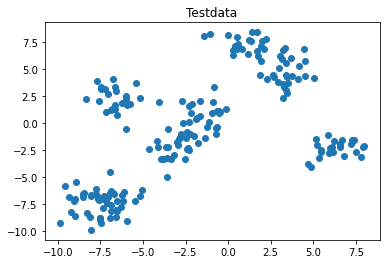

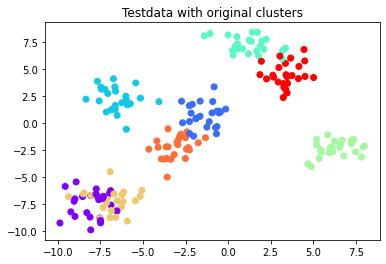

In [ ]:
## Creating the testdata
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
from sklearn.datasets import make_blobs # We use this to create sample data

d=2 # dimensions. In our example 2
number_of_clusters = 8 

# The following code creates random datapoints with number_of_clusters clusters in d dimensions (cluster_std gives the standard deviation. bigger -> wider spread)
data = make_blobs(n_samples=200, n_features=d,centers=number_of_clusters, cluster_std=1)

# The datapoints
points = data[0]

# The cluster assignment used in the creation of the data. This is what we want to obtain by ourself by just considering the points
# contains numbers 0,...,number_of_clusters-1
original_clusters = data[1]

# plots the data points with the original cluster assignment
plt.title("Testdata")
plt.scatter(points[:,0],points[:,1])
plt.show()

plt.title("Testdata with original clusters")
plt.scatter(points[:,0],points[:,1],c=original_clusters,cmap='rainbow')
plt.show()

## Recall from the lecture
Given a $k\geq 1$ (number of clusters) a set of points $P \subset \mathbb{R}^d$ we want to find a function $c: P \rightarrow \{1,\dots,k\}$ which gives the best way of partitioning the set $P$ into $k$ clusters.

For $i=1,\dots,k$ the $i$-th **cluster** is given by 
\begin{align*}
C_i = \left\{ p \in P \mid c(p) = i \right\} \,.
\end{align*}

For a given $c$ the **within-cluster sum of squares (WCSS)** is defined by
\begin{align*}
	S_c = \sum_{i=1}^k \sum_{p \in C_i} ||p - \mu_i||^2 \,.
\end{align*}
Here $\mu_i \in \mathbb{R}^d$ denotes the **mean** of the cluster $C_i$ given by
\begin{align*}
	\mu_i = \frac{1}{|C_i|}\sum_{p \in C_i} p\,.
\end{align*}
The goal is to find a $c$ such that $S_c$ is minimal.


---


## k-means algorithm

1) Initialize the  means $\mu_1, \dots, \mu_k \in \mathbb{R}^d$ with some starting value.
 - **Forgy method:** Choose randomly $k$ different numbers $\{s_1,\dots,s_k\} \subset \{1,\dots,n\}$ and set $$\mu_i= p_{s_i}$$ for $i=1,\dots,k$
 -**Random partition:** Choose $c: P \rightarrow \{1, \dots, k\}$ randomly and set  for $i=1,\dots,k$
\begin{align*}
						\mu_i = \frac{1}{|C_i|}\sum_{p \in C_i} p\,.
\end{align*}

2) Define the clusters $C_i$ for $i=1,\dots,k$ by 
\begin{align*}
	C_i = \big\{ p \in P \mid || p - \mu_i || \leq  || p - \mu_j ||  \text{ for } j = 1,\dots,k \big\}\,.
\end{align*}

3) Recalculate the means $\mu_i$ for $i=1,\dots,k$ by 
\begin{align*}
	\mu_i = \frac{1}{|C_i|}\sum_{p \in C_i} p\,.
\end{align*}

4) Repeat with step 2.



# **Exercise 1**

Implement the k-means algorithm. You can either implement it in your complete own (and maybe much better) way or you can follow the code below. In the code below we represent the function $c: P \rightarrow \{1,\dots,k\}$ as an array of size $n = |P|$ with entries given in $\{0,\dots,k-1\}$.
*italicized text*

In [ ]:
# k-means algorithm

k = 8 # number of clusters


means =np.zeros((k,d))

n = len(points) # number of points  (make sure to execute the code on top of the homework)

clusters = np.zeros((n)) # the current function c 

# Initialize the k-means by using the Forgy method 
def init_forgy():
    randint = np.random.randint(low=0, high=n, size=k)
    means = points[randint]
    print("end of init means",means)

# Initilize the k-means with Random partition
def init_random():
    for i in range(n):
      clusters[i]=np.random.randint(low=1, high=k+1)
    sum=np.zeros(2)
    for i in range(0,k):
      sum=np.zeros(2)
      count=0
      for j in range(0,n):
        if clusters[j]==i+1:
          count=count+1
          sum=points[j]+sum
      means[i]=sum/count


# Updates the means depending on the current clusters
# This is step 3 in the algorithm 
def update_means():
    for i in range(0,k):
      sum=np.zeros(2)
      count=0
      for j in range(0,n):
        if clusters[j]==i+1:
          count=count+1
          sum=points[j]+sum
      if count!=0:
        means[i]=sum/count


# Chooses the cluster according to the current means
# This is step 2
def choose_clusters():
    for m in range(n):
      dist_arr=np.zeros(k)
      for j in range(k):
        dist_arr[j]=np.linalg.norm(points[m]-means[j])
        clusters[m]=np.argmin(dist_arr)+1



# within-cluster sum of squares (WCSS)
def within_cluster_sos():
  sum=0
  for i in range(k):
    for j in range(n): 
      if clusters[j]==i+1:
        sum+=np.linalg.norm(points[j]-means[i])**2
  return sum

# The k-means algorithm with random partition
def kmeans_random(number_of_steps=10):
  init_random() # Step 1

  print("After init with Random Partition: WCSS = ", within_cluster_sos())
  plt.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
  plt.show()

  for s in range(number_of_steps):
    choose_clusters() # Step 2
    update_means() # Step 3

  print("Did ", number_of_steps ," steps. WCSS = ", within_cluster_sos())
  plt.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
  plt.show()

# The k-means algorithm with the Forgy method
def kmeans_forgy(number_of_steps=10):

  choose_clusters()

  print("After init with Forgy: WCSS = ", within_cluster_sos())
  plt.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
  plt.show()

  for s in range(number_of_steps):
    choose_clusters() # Step 2
    update_means() # Step 3

  print("Did ", number_of_steps ," steps. WCSS = ", within_cluster_sos())
  plt.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
  plt.show()

Test your implementation with the following code (You can also implement your own tests).


After init with Random Partition: WCSS =  9424.50907095041


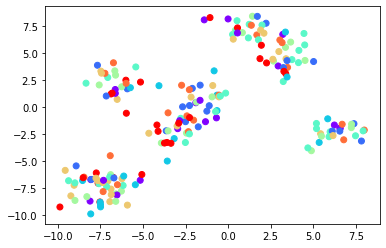

Did  20  steps. WCSS =  492.5095687836322


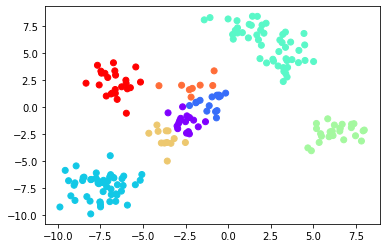

after random [[-2.49930383 -1.40946879]
 [-1.02359201  0.41360748]
 [-7.44103563 -7.34304875]
 [ 2.2945755   5.87047134]
 [ 6.35103174 -2.32041056]
 [-3.66095144 -2.91939287]
 [-2.08675439  1.96456838]
 [-6.6566409   2.23921255]]
After init with Forgy: WCSS =  3537.4175765515697


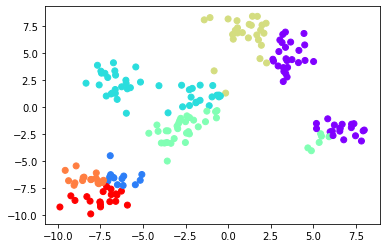

Did  20  steps. WCSS =  434.3404198656006


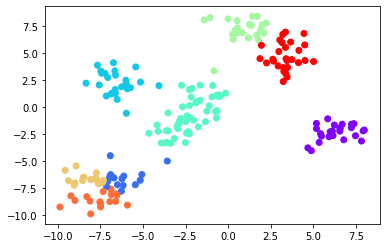

In [ ]:
kmeans_random(20)
randint = np.random.randint(low=0, high=n, size=k)
means = points[randint]
kmeans_forgy(20)

# **Exercise 2** (Bonus)

For a given dataset consider different $k$. Plot the WCSS for different $k$ after using the $k$-means algorithm. How can you decide with this graph which $k$ might be the best?

2 clusters:
After init with Random Partition: WCSS =  9977.366406773997


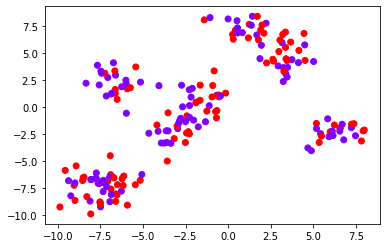

Did  20  steps. WCSS =  4401.64914254651


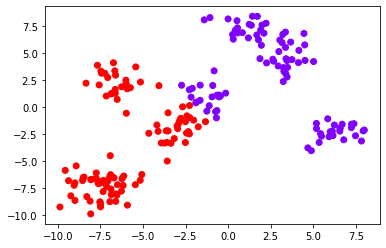

3 clusters:
After init with Random Partition: WCSS =  9892.976173475545


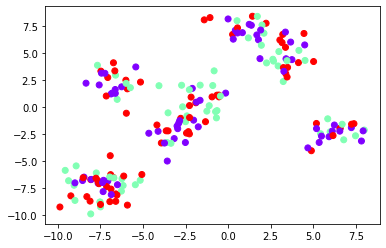

Did  20  steps. WCSS =  2522.0399145232705


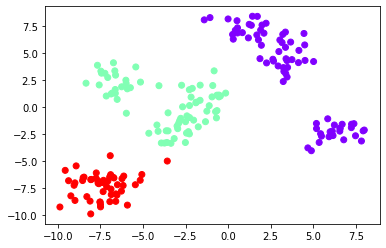

4 clusters:
After init with Random Partition: WCSS =  9795.71937787912


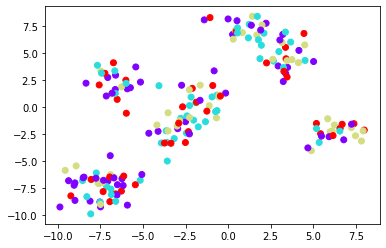

Did  20  steps. WCSS =  2071.049190902528


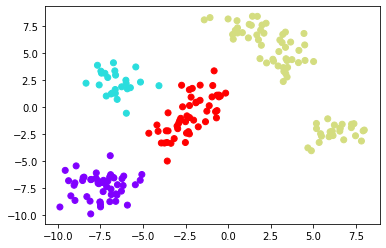

5 clusters:
After init with Random Partition: WCSS =  9834.7541021217


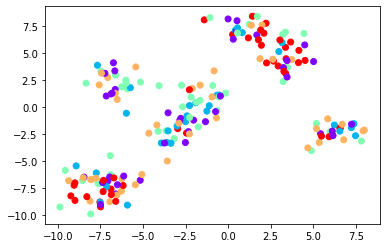

Did  20  steps. WCSS =  674.9770708542965


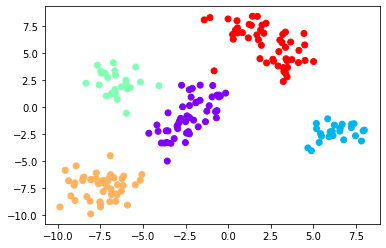

6 clusters:
After init with Random Partition: WCSS =  9782.159274584066


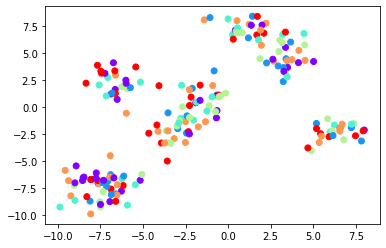

Did  20  steps. WCSS =  531.7936157349395


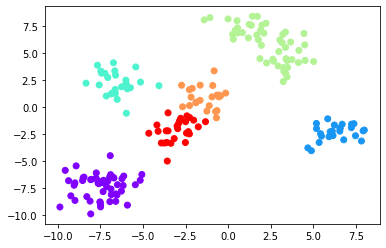

7 clusters:
After init with Random Partition: WCSS =  9800.514806087946


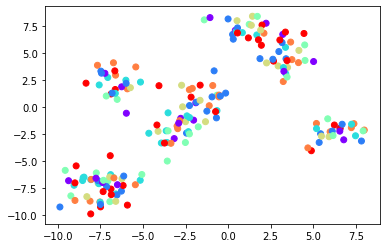

Did  20  steps. WCSS =  531.7936157349393


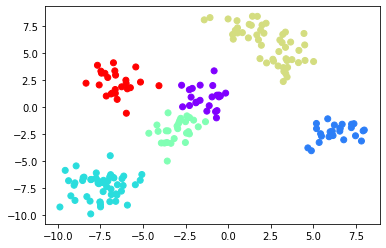

8 clusters:
After init with Random Partition: WCSS =  9620.40134469042


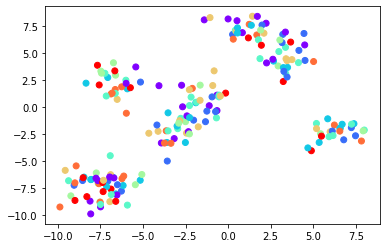

Did  20  steps. WCSS =  497.1285943946661


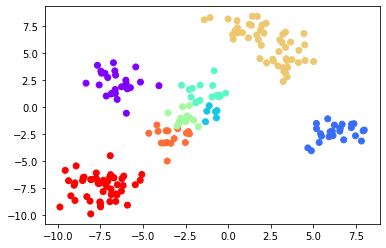

In [ ]:
print("Initialization with random partition:")
for k in range(2,9):
  print(k, "clusters:")
  kmeans_random(20)

By inspection, k=6 might be the best for this implementation (using random partition initialization).

2 clusters:
After init with Forgy: WCSS =  8292.854226094692


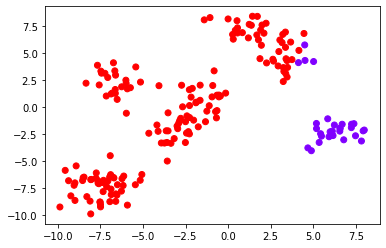

Did  20  steps. WCSS =  4401.64914254651


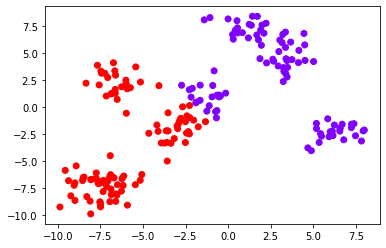

3 clusters:
After init with Forgy: WCSS =  8292.841667544782


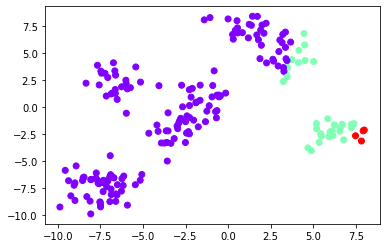

Did  20  steps. WCSS =  3070.786206174078


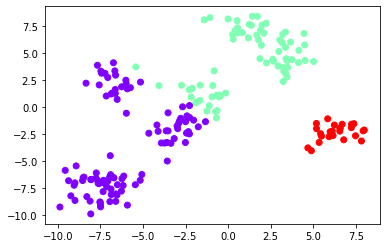

4 clusters:
After init with Forgy: WCSS =  3279.9117902178536


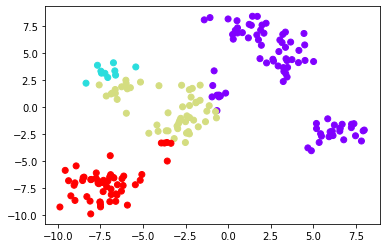

Did  20  steps. WCSS =  2071.161121097892


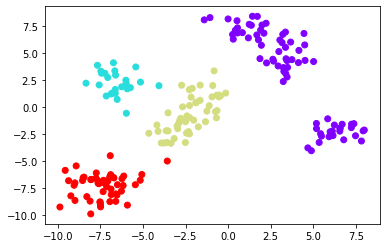

5 clusters:
After init with Forgy: WCSS =  2615.1451861181727


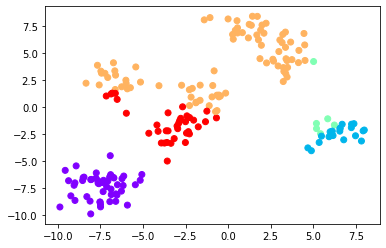

Did  20  steps. WCSS =  970.323361449223


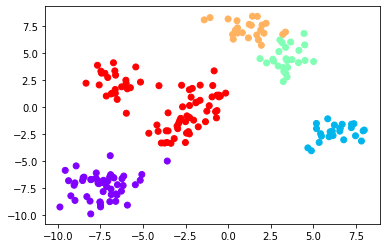

6 clusters:
After init with Forgy: WCSS =  2755.468105450497


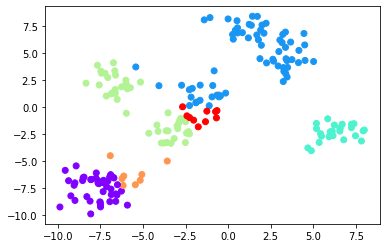

Did  20  steps. WCSS =  628.9780589728149


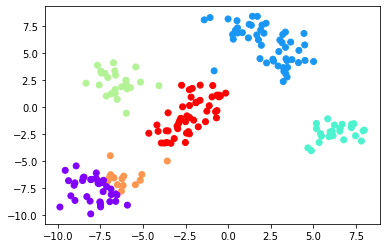

7 clusters:
After init with Forgy: WCSS =  1857.57541820998


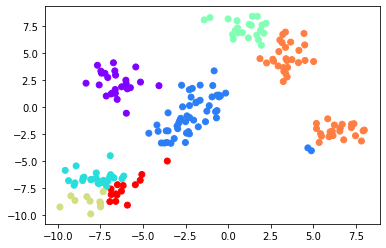

Did  20  steps. WCSS =  593.3655087899089


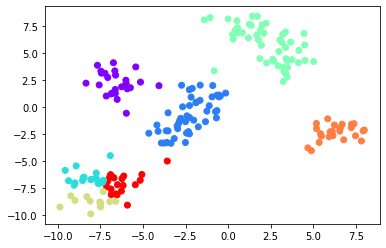

8 clusters:
After init with Forgy: WCSS =  4148.68730561341


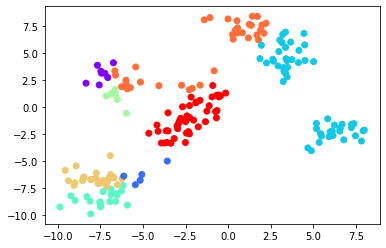

Did  20  steps. WCSS =  570.5144151941827


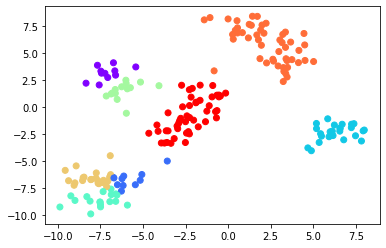

In [ ]:
for k in range(2,9):
  print(k, "clusters:")
  randint = np.random.randint(low=0, high=n, size=k)
  means = points[randint]
  kmeans_forgy(20)

By inspection, k=4 might be the best for this implementation (using forgy method initialization).